In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
!pip list

In [144]:
import tensorflow as tf
import os

In [145]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [146]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [147]:
import cv2
import imghdr

In [148]:
data_dir = 'data' 

In [149]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [150]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\happy\.ipynb_checkpoints


In [151]:
#Load Data

In [152]:
import numpy as np
from matplotlib import pyplot as plt

In [195]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 312 files belonging to 2 classes.


In [196]:
data_iterator = data.as_numpy_iterator()

In [197]:
batch = data_iterator.next()

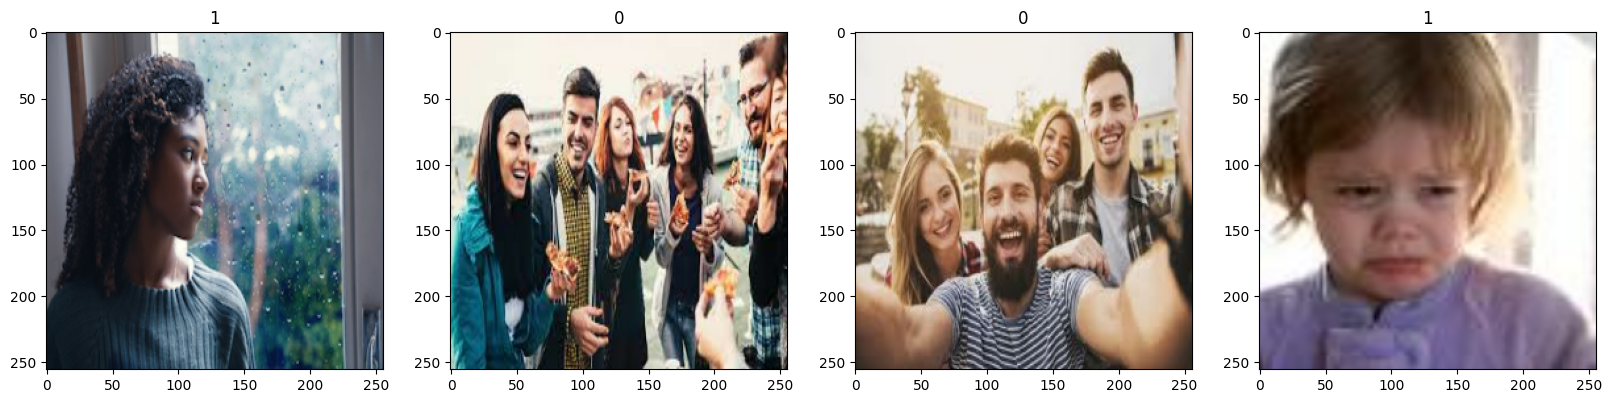

In [198]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [157]:
data = data.map(lambda x,y: (x/255, y))

In [158]:
data.as_numpy_iterator().next()

(array([[[[0.8862745 , 0.6784314 , 0.5137255 ],
          [0.8862745 , 0.68081343, 0.52087164],
          [0.8876302 , 0.6878049 , 0.5310004 ],
          ...,
          [0.82259345, 0.6304366 , 0.51278955],
          [0.8368566 , 0.64469975, 0.5270527 ],
          [0.8463848 , 0.6542279 , 0.53658086]],
 
         [[0.88602173, 0.6784314 , 0.514231  ],
          [0.88602173, 0.6811205 , 0.5212236 ],
          [0.88729006, 0.68954957, 0.53514546],
          ...,
          [0.79103404, 0.5988772 , 0.48123014],
          [0.80368483, 0.611528  , 0.4938809 ],
          [0.81290597, 0.62074906, 0.503102  ]],
 
         [[0.88151044, 0.6792739 , 0.52241117],
          [0.88125455, 0.68616414, 0.52691936],
          [0.88138044, 0.6958945 , 0.5381129 ],
          ...,
          [0.7564799 , 0.564323  , 0.446676  ],
          [0.76467067, 0.5725138 , 0.45486677],
          [0.7691789 , 0.5770221 , 0.459375  ]],
 
         ...,
 
         [[0.5371247 , 0.5724188 , 0.49006587],
          [0.72802

In [159]:
#Split Data

In [160]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [161]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [162]:
#Build Model

In [163]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [164]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [165]:
model = Sequential()

In [166]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [167]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [168]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [169]:
#Train

In [170]:
logdir='logs'

In [171]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [172]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 4s 355ms/step - loss: 1.4412 - accuracy: 0.5089 - val_loss: 0.6906 - val_accuracy: 0.4531
Epoch 2/20
7/7 [==============================] - 4s 394ms/step - loss: 0.6905 - accuracy: 0.4911 - val_loss: 0.6560 - val_accuracy: 0.7500
Epoch 3/20
7/7 [==============================] - 4s 374ms/step - loss: 0.6466 - accuracy: 0.6205 - val_loss: 0.5894 - val_accuracy: 0.6094
Epoch 4/20
7/7 [==============================] - 4s 450ms/step - loss: 0.5935 - accuracy: 0.6920 - val_loss: 0.5165 - val_accuracy: 0.8438
Epoch 5/20
7/7 [==============================] - 4s 357ms/step - loss: 0.5098 - accuracy: 0.7455 - val_loss: 0.4338 - val_accuracy: 0.7969
Epoch 6/20
7/7 [==============================] - 4s 362ms/step - loss: 0.4100 - accuracy: 0.8214 - val_loss: 0.3701 - val_accuracy: 0.8438
Epoch 7/20
7/7 [==============================] - 4s 367ms/step - loss: 0.3697 - accuracy: 0.8616 - val_loss: 0.3297 - val_accuracy: 0.8125
Epoch 8/20
7/7 [====

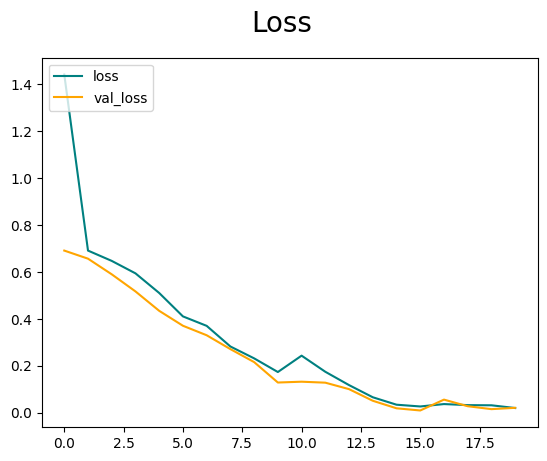

In [173]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

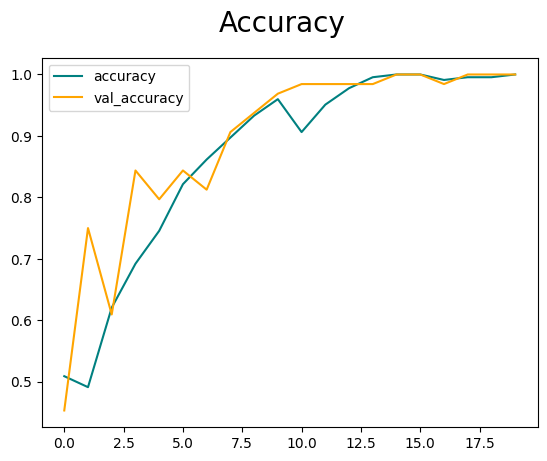

In [174]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [175]:
#Evaluate


In [176]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [177]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [178]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 628ms/step


In [179]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [180]:
import cv2

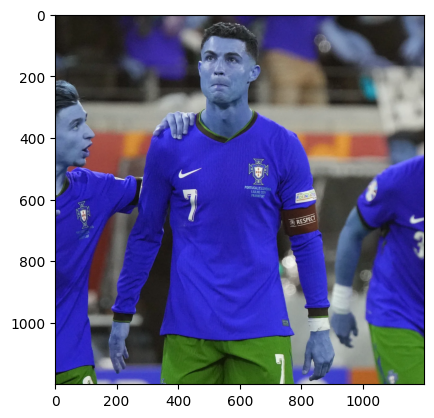

In [181]:
img = cv2.imread('ronaldo.jpg')
plt.imshow(img)
plt.show()

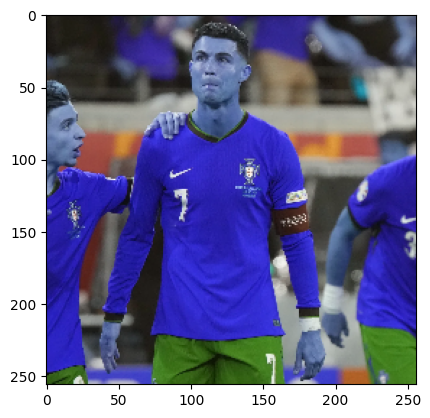

In [182]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [183]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 21ms/step


In [184]:
yhat


array([[0.71594423]], dtype=float32)

In [200]:
if yhat > 0.5:
    print("🔍 Emotion Detected: 😢 Sad")
else:
    print("🔍 Emotion Detected: 😄 Happy")


🔍 Emotion Detected: 😢 Sad


In [ ]:
#Save the model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))